Task 1: Exploring and Visualizing a Simple Dataset

Data Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.4

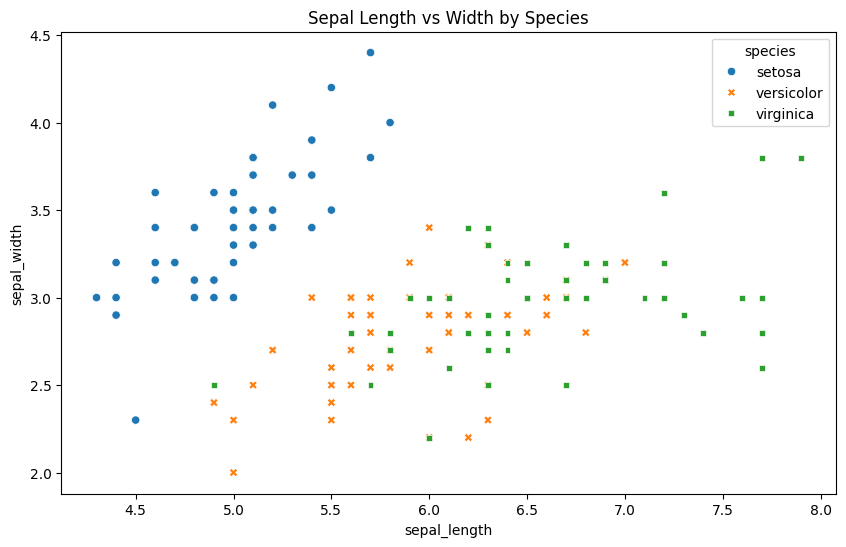

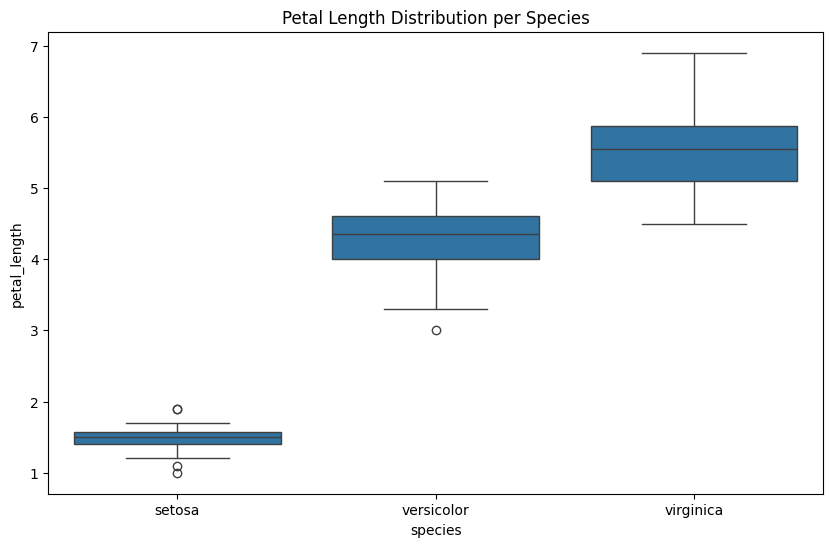

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load the dataset
df = sns.load_dataset('iris')

# 2. Inspect the data
print("Data Info ")
print(df.info())
print("\nSummary Statistics")
print(df.describe())

# 3. Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species')
plt.title('Sepal Length vs Width by Species')
plt.show()

# Boxplot for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='petal_length')
plt.title('Petal Length Distribution per Species')
plt.show()

Task 3: Heart Disease Prediction

Using Colab cache for faster access to the 'heartcsv' dataset.
Path to dataset files: /kaggle/input/heartcsv
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



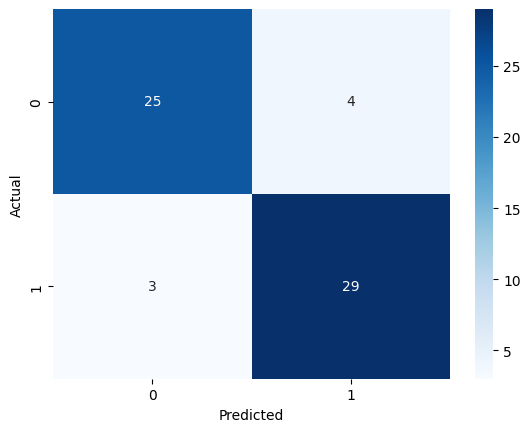

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import os

import kagglehub

# Download latest version
path = kagglehub.dataset_download("arezaei81/heartcsv")

print("Path to dataset files:", path)
# 1. Load and Clean
df = pd.read_csv(os.path.join(path, 'heart.csv'))
df = df.dropna()

# 2. Split Features and Target
X = df.drop('target', axis=1) # Assuming 'target' is the column name
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Task 4: General Health Query Chatbot (Prompt Engineering)

In [10]:

import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM


model_name = "google/flan-t5-large"

print("Loading model... (this may take 1-2 minutes first time)")
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

print("Model loaded successfully!\n")


EMERGENCY_KEYWORDS = [
    "chest pain", "heart attack", "suicide",
    "overdose", "difficulty breathing",
    "stroke", "severe bleeding"
]

DOSAGE_KEYWORDS = [
    "dosage", "how many mg",
    "how much should i take",
    "exact dose"
]

def is_emergency(query):
    return any(word in query.lower() for word in EMERGENCY_KEYWORDS)

def is_dosage_question(query):
    return any(word in query.lower() for word in DOSAGE_KEYWORDS)


SYSTEM_PROMPT = """
Act like a helpful and friendly medical assistant.

Rules:
- Provide general health information only.
- Do NOT diagnose medical conditions.
- Do NOT prescribe medications.
- Do NOT provide exact dosages.
- If symptoms are serious, advise seeing a doctor.
- Use simple and clear language.
- Be calm and supportive.
"""

def get_response(user_query):
    prompt = SYSTEM_PROMPT + "\nUser: " + user_query + "\nAssistant:"

    inputs = tokenizer(prompt, return_tensors="pt", truncation=True)

    outputs = model.generate(
        **inputs,
        max_new_tokens=200,
        temperature=0.4
    )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return response

#
def health_chatbot():
    print("🩺 General Health Assistant Chatbot")
    print("Type 'exit' to quit.\n")

    while True:
        user_query = input("You: ")

        if user_query.lower() == "exit":
            print("\nStay healthy! 👋")
            break

        # Safety Layer 1: Emergency Detection
        if is_emergency(user_query):
            print("\n⚠️ This may be a medical emergency.")
            print("Please seek immediate medical attention or contact emergency services.\n")
            continue

        # Safety Layer 2: Dosage Blocking
        if is_dosage_question(user_query):
            print("\n⚠️ I cannot provide specific dosage instructions.")
            print("Please consult a doctor or pharmacist for proper guidance.\n")
            continue

        # Get LLM Response
        response = get_response(user_query)

        print("\nAssistant:", response)

if __name__ == "__main__":
    health_chatbot()


Loading model... (this may take 1-2 minutes first time)


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/558 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Model loaded successfully!

🩺 General Health Assistant Chatbot
Type 'exit' to quit.

You: i have fever


The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



Assistant: Be calm and supportive.

⚠️ This information is for general knowledge only and not a substitute for professional medical advice.

You: exit

Stay healthy! 👋
